# importing libraries 

In [412]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# importing datsets 

In [413]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# data exploration 

In [414]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [415]:
train.shape

(8693, 14)

In [416]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [417]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [418]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

# cleaning data 

In [419]:
def cleaning_data(data):
   # data['Groub_num'] = train['PassengerId'].apply(lambda x:x.split('_')[0])
   # data['Passenger_num'] = train['PassengerId'].apply(lambda x:x.split('_')[1])
    data['HomePlanet'].fillna(data['HomePlanet'].mode()[0],inplace=True)
    data['Cabin'].fillna(data['Cabin'].mode()[0],inplace = True)
    data['Destination'].fillna(data['Destination'].mode()[0],inplace = True)
    data['Age'].fillna(data['Age'].mean(),inplace=True)
    data['CryoSleep'].fillna(False,inplace=True)
    data['RoomService'].fillna(data['RoomService'].mean(),inplace = True)
    data['VIP'].fillna(True,inplace=True)
    data['Spa'].fillna(data['Spa'].mean(),inplace = True)
    data['ShoppingMall'].fillna(data['ShoppingMall'].mean(),inplace = True)
    data['VRDeck'].fillna(data['VRDeck'].mean(),inplace = True)
    data['FoodCourt'].fillna(data['FoodCourt'].mean(),inplace = True)
    data = data.drop(columns = ['Name'],inplace=True)
    

In [420]:
passenger_id = test.PassengerId
passenger_id

0       0013_01
1       0018_01
2       0019_01
3       0021_01
4       0023_01
         ...   
4272    9266_02
4273    9269_01
4274    9271_01
4275    9273_01
4276    9277_01
Name: PassengerId, Length: 4277, dtype: object

In [421]:
cleaning_data(train)
cleaning_data(test)

In [422]:
train.sample()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
535,0569_01,Earth,False,F/116/P,TRAPPIST-1e,23.0,False,0.0,334.0,310.0,0.0,0.0,True


# encoding categorical 

In [423]:
from sklearn.preprocessing import LabelEncoder
def encode_categorical(data): 
    LE = LabelEncoder()
    for feature in data.columns:
        if data[feature].dtype == object:
            data[feature] = LE.fit_transform(data[feature])
    
    data['VIP'] = data['VIP'].astype(int)
    data['CryoSleep'] = data['CryoSleep'].astype(int)
    if data is train:
        data['Transported'] = data['Transported'].astype(int)


In [424]:
encode_categorical(train)
encode_categorical(test)

In [425]:
test.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [426]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   int32  
 1   HomePlanet    8693 non-null   int32  
 2   CryoSleep     8693 non-null   int32  
 3   Cabin         8693 non-null   int32  
 4   Destination   8693 non-null   int32  
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   int32  
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Transported   8693 non-null   int32  
dtypes: float64(6), int32(7)
memory usage: 645.3 KB


# find relation using plots 

([<matplotlib.patches.Wedge at 0x1dec539f110>,
 [Text(-0.18065168624423047, 1.085064499583834, '0'),
  Text(-0.4988757573000686, -0.9803687973300064, '1'),
  Text(0.8851278775740179, -0.6531069134079922, '2')],
 [Text(-0.09853728340594388, 0.591853363409364, '55.25%'),
  Text(-0.27211404943640105, -0.534746616725458, '24.51%'),
  Text(0.48279702413128245, -0.35624013458617754, '20.23%')])

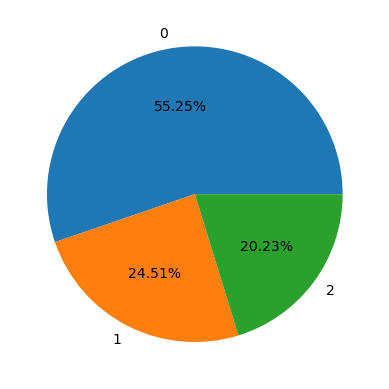

In [427]:
home_planet = train['HomePlanet'].value_counts()
plt.pie(home_planet.values,labels=home_planet.index,autopct='%.2f%%')

Text(0, 0.5, 'number of passengers in this age')

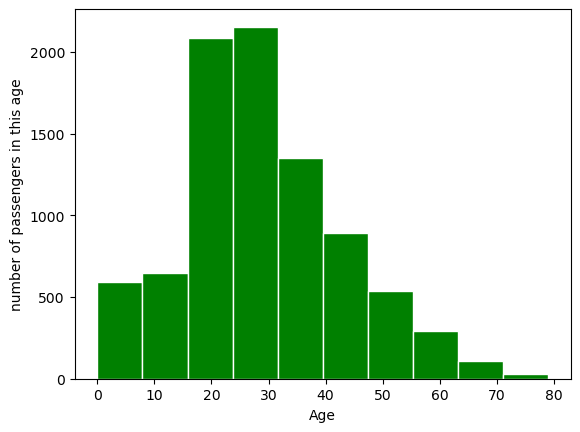

In [428]:
plt.hist(train['Age'],color='g',edgecolor='w')
plt.xlabel('Age')
plt.ylabel('number of passengers in this age')


    Cabin          8693 non-null   int32  
 4   Destination    8693 non-null   int32  
 7   RoomService    8693 non-null   float64
 8   FoodCourt      8693 non-null   float64
 9   ShoppingMall   8693 non-null   float64
 10  Spa            8693 non-null   float64
 11  VRDeck         8693 non-null   float64
 12  Transported    8693 non-null   int32  
 13  Group_num      8693 non-null   int32  
 14  Passenger_num  8693 non-null   int32  
dtypes: float64(6), int32(9)

([<matplotlib.patches.Wedge at 0x1dec52031d0>,
 [Text(-0.5013544278510114, 0.9791035377702325, '0'),
  Text(0.5013545195212984, -0.9791034908300389, '1')],
 [Text(-0.27346605155509707, 0.5340564751473995, '65.06%'),
  Text(0.27346610155707185, -0.5340564495436575, '34.94%')])

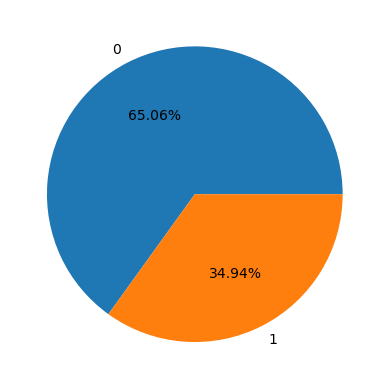

In [429]:
cryo_sleep = train['CryoSleep'].value_counts()
plt.pie(cryo_sleep.values,labels=cryo_sleep.index,autopct='%.2f%%')

([<matplotlib.patches.Wedge at 0x1dec528da10>,
 [Text(-1.0884119378321695, 0.1592465182803749, '0'),
  Text(1.088411947150752, -0.15924645459007486, '1')],
 [Text(-0.5936792388175469, 0.08686173724384084, '95.38%'),
  Text(0.5936792439004102, -0.0868617025036772, '4.62%')])

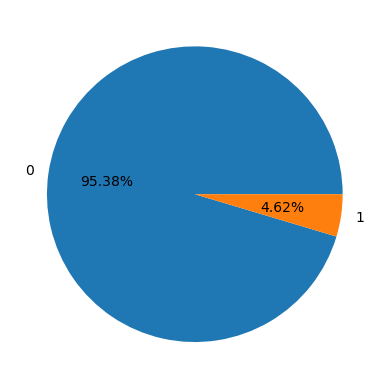

In [430]:
vip = train['VIP'].value_counts()
plt.pie(vip.values,labels=vip.index,autopct='%.2f%%')

<Axes: >

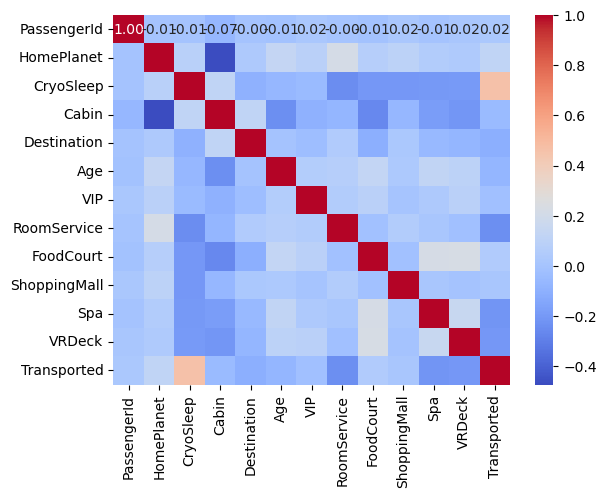

In [431]:
corr = train.corr()
sns.heatmap(corr,annot=True,fmt='.2f',cmap='coolwarm')

In [432]:
X = train.drop('Transported',axis= 1)
y = train.Transported

In [433]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test  = train_test_split(X,y,test_size=.4,random_state=0)

In [434]:
from sklearn.metrics import accuracy_score, confusion_matrix
def training_model(model):
    model.fit(x_train,y_train)
    y_predict = model.predict(x_test)
    acc = accuracy_score(y_test,y_predict)
    cm = confusion_matrix(y_predict,y_test)
    return acc,cm
    

In [435]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

classifiers = [LogisticRegression(),
               DecisionTreeClassifier(max_leaf_nodes=10),
               GaussianNB(),
               SVC(),
               KNeighborsClassifier(n_neighbors=5),
               RandomForestClassifier(),
              ]
results = []
for classifier in classifiers:
    acc,cm = training_model(classifier)
    results.append({'accurecy':acc,'Confusion metraix':cm})
results


[{'accurecy': 0.7866589994249569,
  'Confusion metraix': array([[1241,  253],
         [ 489, 1495]], dtype=int64)},
 {'accurecy': 0.7671075330649799,
  'Confusion metraix': array([[1321,  401],
         [ 409, 1347]], dtype=int64)},
 {'accurecy': 0.6894767107533065,
  'Confusion metraix': array([[ 762,  112],
         [ 968, 1636]], dtype=int64)},
 {'accurecy': 0.7757331799884991,
  'Confusion metraix': array([[1115,  165],
         [ 615, 1583]], dtype=int64)},
 {'accurecy': 0.7489936745255894,
  'Confusion metraix': array([[1257,  400],
         [ 473, 1348]], dtype=int64)},
 {'accurecy': 0.7912593444508338,
  'Confusion metraix': array([[1391,  387],
         [ 339, 1361]], dtype=int64)}]

In [436]:
val_X = test

In [437]:
classifier = RandomForestClassifier()
classifier.fit(x_train,y_train)
y_predict = classifier.predict(val_X)
y_predict = y_predict.astype(bool)

In [438]:
y_predict_df = pd.DataFrame(y_predict, columns=['Transported'])

In [442]:
submition = pd.concat([passenger_id,y_predict_df],axis=1)

In [443]:
submition.to_csv('result.csv', index=False)

print("DataFrame saved to 'result.csv'")

DataFrame saved to 'result.csv'


0       0013_01
1       0018_01
2       0019_01
3       0021_01
4       0023_01
         ...   
4272    9266_02
4273    9269_01
4274    9271_01
4275    9273_01
4276    9277_01
Name: PassengerId, Length: 4277, dtype: object